# Data Pre-Processing & Exploration
### Group 03:
- Catarina Oliveira | 20211616
- Daniel Kruk | 20211687
- Joana Rosa | 20211516
- Marcelo Junior | 20211677
- Martim Serra | 20211543

##### This notebook includes:
 - Exploration of the dataset before it was treated in the preprocessing stage;

 - The preprocessing stage itself;

 - Exploration of the data after the preprocessing stage;

##### Table of contents:  
- Part 0: Analyzing the Original Data
    - 0.1 Importing the packages
    - 0.2 Importing and Simple exploration the dataset
    - 0.3 Analzying the numerical variables 
    - 0.4 Analyzing the categorical variables 
    
- Part 1: Pre-Processing the Data
    - 1.1. Case Normalization
    - 1.2. Handling Contractions
    - 1.3. Random Element Removal
    - 1.4. Tokenization
    - 1.5. Different Language Verification
    - 1.6. Stopword Removal
    - 1.7. Lemmatization (with POS Tagging)
    - 1.8. Pre-Processing the Test Dataset
    
- Part 2: Taking a look at the dataset after the treatment (after-preproc)

- Part 3: Exporting the final datasets


#### 0.1 Importing the packages

In [1]:
#For the functions to update automatically
%load_ext autoreload
%autoreload 2

#Importing basic packages
import pandas as pd
import numpy as np

#Importing packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from typing import Optional

# Set default figure size for all visualizations
plt.rcParams['figure.figsize'] = (10, 6)


#Importing packages for treating the text data
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag_sents
from langdetect import detect #For translating the data
import spacy #For lemmatization

#Importing a library that contains some of the emojis that appear in the text
import emoji


#Importing our created functions 
from functions import *

#So that warnings do not display
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\danie\.conda\envs\T

DONE


#### 0.2 Importing and simple exploration of the Dataset


In [2]:
#Importing the data
udata = pd.read_csv("C:\\Users\\danie\\Downloads\\data_updated\\train.csv", index_col='id')
#Checking the data
udata

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...
1584150,Stealing Hearts,pop,Katie Armiger,2013,126,{},You've been warned about me\nDon't try to get ...
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...
...,...,...,...,...,...,...,...
1702980,Manhattan,pop,Tijuana Sweetheart,2007,48,{},If I knew when I was young that I'd be older\n...
4802970,Belly Shit,rap,Lil Gotit,2019,3593,"{""Lil Troup""}",[Intro: Lil Gotit]\nCash\nWah-wah-wah\nWah-wah...
403929,The Four Loves,rock,Heath McNease,2014,301,{},[Verse 1]\nI was born inside a home\nThe young...


In [3]:
#Simple check ups on the data
udata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134967 entries, 535805 to 6177674
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     134965 non-null  object
 1   tag       134967 non-null  object
 2   artist    134967 non-null  object
 3   year      134967 non-null  int64 
 4   views     134967 non-null  int64 
 5   features  134967 non-null  object
 6   lyrics    134967 non-null  object
dtypes: int64(2), object(5)
memory usage: 8.2+ MB


From using the `.info()` method we see that all our columns that include text are already in the right format (object data type means that our data consists of strings)

We see that we have no missing values in any of the original columns of the dataset

Now we will check:

1. The descriptive statistics (& the distribution) of the numerical variables

2. The distribution of the different categorical variables

#### 0.3 Analzying the numerical variables

A first look at the descriptive statistics of the numerical features of the dataset:

In [4]:
#Checking the descriptive statistics of the numerical variables
udata.describe().T

,count,mean,std,min,25%,50%,75%,max
year,134967.0,2009.467537,46.287743,1.0,2008.0,2015.0,2019.0,2024.0
views,134967.0,3413.344032,41924.494314,0.0,22.0,89.0,473.0,3604497.0


From looking at the output of the `.describe()` method we can tell that both variables have a very wide range of possible values. 
The variable year having values that start in year 1 could be a very interesting aspect to look at in the future sections of this notebook as well as all those observations belonging to the first quartile of the variable year (since there could be more curious values for the variable year until 2008).
Regarding the variable views there is not much to be said from this initial perspective since we could state those songs with the minimum value in the views column (songs with views = 0) may have not been released yet or just not been viewed by anyone yet.

##### _Variable `Year`_

Initially we are going to take a look at how many songs date from every year. In essence we will see how many songs were published on a yearly basis and to do so we will initially create a variable that will contain the total amount of times every year appears in the dataset.

This will be done considering every count of each year as a song (because all songs have a year in which they were released).

In [5]:
#Different Year Count
releases_per_year = udata['year'].value_counts().sort_index()
releases_per_year

year
1          45
3           1
4           1
6           1
7           1
        ...  
2020    14027
2021    12368
2022     2707
2023       13
2024        1
Name: count, Length: 282, dtype: int64

Now we will be plotting the distribution of the total releases that occurred yearly using the `create_line_plot` function that we have available in the `functions.py` file

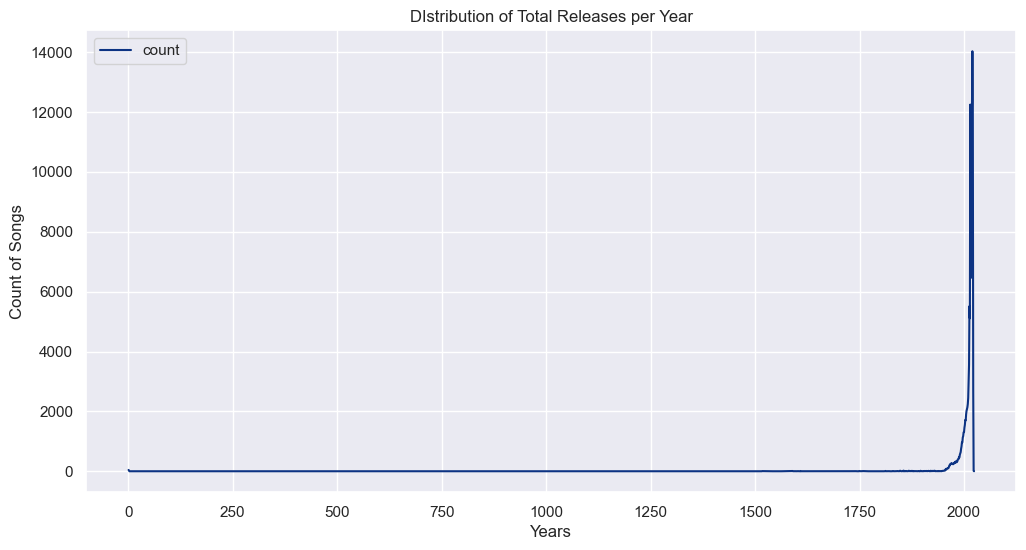

In [6]:
#Creating the line plot to represent the variation of Releases over time
create_line_plot(data=pd.DataFrame({'year': releases_per_year.index, 'count': releases_per_year.values}),
                 x_column='year', y_column='count', title='DIstribution of Total Releases per Year',
                 xlabel='Years', ylabel='Count of Songs')

The output of the initial descriptive statistics already told us that the values of year had a very amplified range (ranging from the year 0 all the way to the year 2024). For a more intuitive prespective we created the plot above and as expected it allows us to have a bteer perspective on the distribution of the first quartile of the dataset (observations whose year ranges from 1 to 2008).

It is clear that the higher density of observations is located surrounding the years 2000. However, there are several observations whose 'year' variable value range between 1 and 2008 and it is very difficult to see how the distribution of those observations. The later ones, are not too worrying but the we will still take a look into those observations dating to the early years present in the 1st Quartile.

In [7]:
udata[udata['year'] <= 2008]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...
5659885,Old Friend,pop,Tom Robinson,1984,19,{},These will be the days\nThat we'll remember in...
1007749,Enjoy the Silence,pop,Swift (Band),1999,262,{},Words like violence break the silence\nAnd com...
1469415,Back In Red,pop,X-Sinner,2008,162,{},Been down too long and it’s sure been tough\nB...
1095455,If You’re Ever In My Arms,country,Ricky Van Shelton,1991,309,{},Oh I wish that you could see\nJust how smart n...
...,...,...,...,...,...,...,...
1265832,The Others,pop,Cerebral Turbulency,2003,18,{},An empty room full of shadows\nVoices resonate...
1756600,Born Toulouse-Lautrec,rock,New Bomb Turks,1993,1564,{},I had a friend\nHe said he was an artist\nKnew...
979437,Crazy For Leaving You,pop,A1 (Band),2002,136,{},Crazy\nThe crazy things I heard you say I'm ma...


In [8]:
#Subsample the dataset based on the first quartile value
oldies = udata[udata['year'] <= 2008]

oldies_yearly = oldies['year'].value_counts().sort_index()

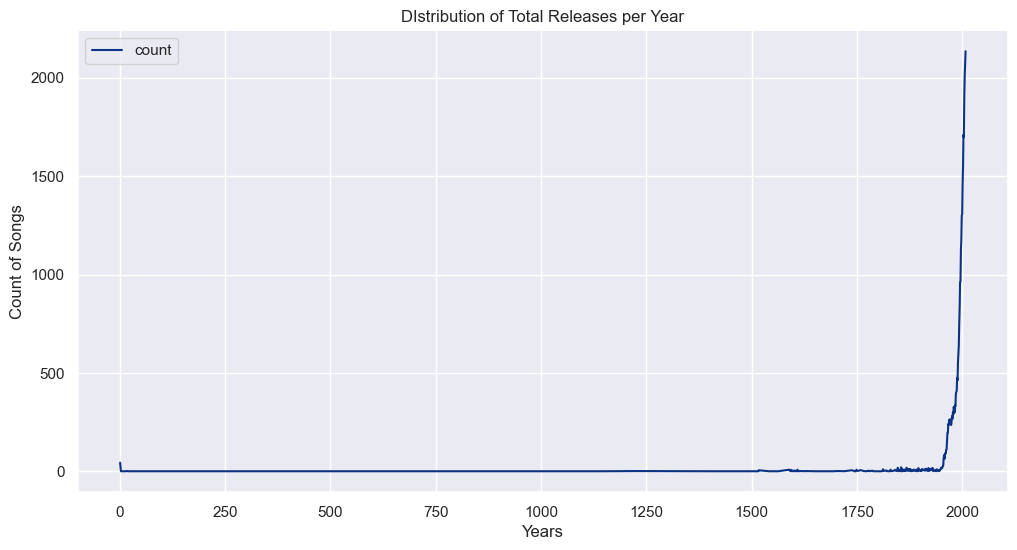

In [9]:
create_line_plot(data=pd.DataFrame({'year': oldies_yearly.index, 'count': oldies_yearly.values}),
                 x_column='year', y_column='count', title='DIstribution of Total Releases per Year',
                 xlabel='Years', ylabel='Count of Songs')

We can se that the plot above is not yet representative of the distribution of releases we have spread through the 1st Quartile so we will try to narrow down our focus even more.

In [10]:
#Subsample the dataset even more
classics = udata[udata['year'] <= 1800]

classics_yearly = classics['year'].value_counts().sort_index()

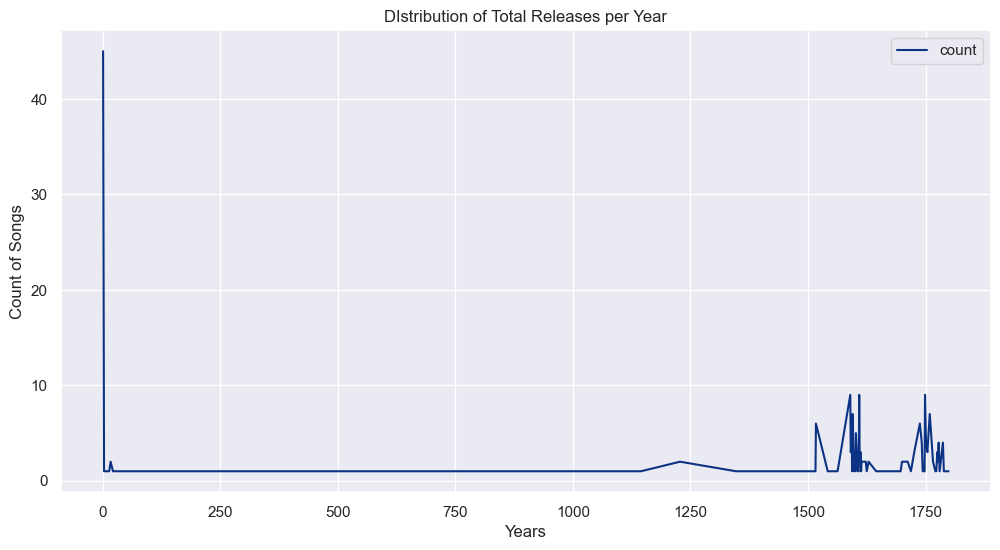

In [11]:
create_line_plot(data=pd.DataFrame({'year': classics_yearly.index, 'count': classics_yearly.values}),
                 x_column='year', y_column='count', title='DIstribution of Total Releases per Year',
                 xlabel='Years', ylabel='Count of Songs')

In [12]:
classics

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...
2393721,Parks n Wreck,rap,Joshy Raps,6,54,{},"All the same height, same size, same level but..."
157352,A Treatise of Human Nature Chap. 2.3.9,misc,David Hume,1738,2,{},Of The Direct Passions\n\nIt is easy to observ...
157275,A Treatise of Human Nature Chap. 1.4.7,misc,David Hume,1738,12,{},Conclusion Of This Book.\n\nBut before I launc...
7252806,Insecure,pop,Taylor Stannard,69,156,{},(verse one)\n\nI’m not afraid to suck your bal...
...,...,...,...,...,...,...,...
692436,Cynthia’s Revels - Scene Gargaphie Prologue,misc,Ben Jonson,1600,18,{},SCENE GARA...
671037,Every Man out of His Humour Act 1. Scene 1,misc,Ben Jonson,1599,40,{},"The Country.\n\nENTER MACILENTE, WITH A BOOK.\..."
238835,Aeneid: Book 3,misc,Publius Vergilius Maro,1697,189,"{""John Dryden""}","""When Heav'n had overturn'd the Trojan state\n..."


Now, from this plot we can clearly see that there are a lot of rows from our dataset (songs if one will) that date from various random years prior to the year 1800. These are very peculiar cases (and a small number of them (221 only)) which we wont be looking into with a lot of interest because the variable year will not be very relevant for the construction of our model, however it is worth knowing that these rows are here, in case we for some reason think about dropping them.

Curiously most of these rows appear to be out of books or plays of some kind.

#### _Variable `Views`_

Now we will be plotting the distribution of views that occured every year.

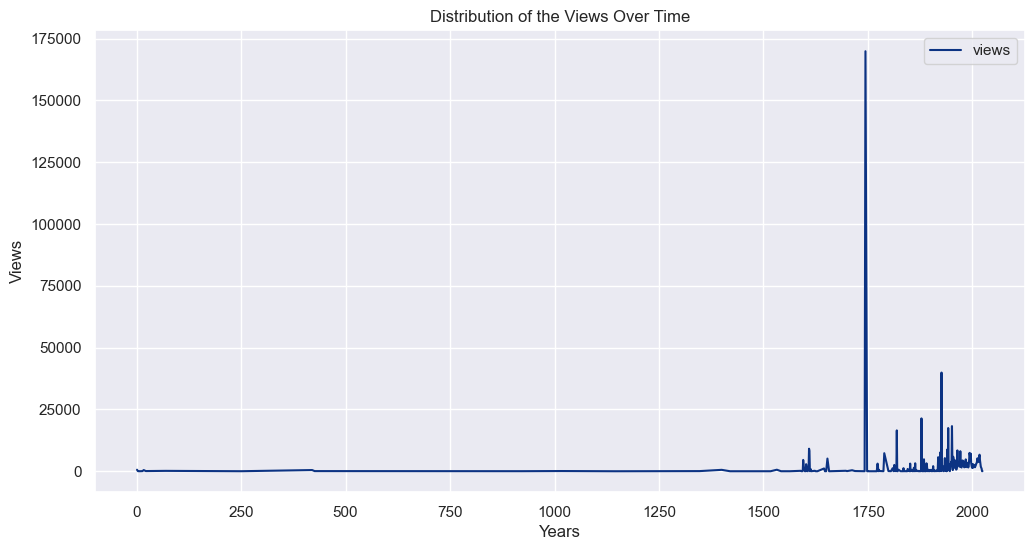

In [13]:
#Creating the line plot to represent the variation of Views over time
create_line_plot(udata, 'year', 'views',
                 'Distribution of the Views Over Time', 
                 'Years', 'Views')

As we can see the distribution of the Views variable is far from being uniform. It is highly left-skewed with most views being centered around the years prior to 2000. Curiously enough we have an enormous peak around 1750 which is very curious - since back then there was no way of identifying or counting how many views a given music had (since there were obviously no streaming platforms back then).


In [14]:
# Checking observations with year around 1750
udata[(udata['year'] >= 1700) & (udata['year'] <= 1800)]


,title,tag,artist,year,views,features,lyrics
id,,,,,,,
157352,A Treatise of Human Nature Chap. 2.3.9,misc,David Hume,1738,2,{},Of The Direct Passions\n\nIt is easy to observ...
157275,A Treatise of Human Nature Chap. 1.4.7,misc,David Hume,1738,12,{},Conclusion Of This Book.\n\nBut before I launc...
159049,The History of England Vol.I. Chap 1.45,misc,David Hume,1754,42,{},James I\n\n\n1603.\n\nThe crown of England was...
158886,The History of England Vol.I. Part A. Chap 6,misc,David Hume,1778,35,{},Henry I\n\nAfter the adventurers in the holy w...
175218,Don Carlos Act 4 Scene 5,misc,Friedrich Schiller,1787,3,"{""R.D. Boylan""}",MARQUIS POSA comes through the gallery. CARLOS...
...,...,...,...,...,...,...,...
6635810,A proof that even the humblest fortune may gra...,misc,Oliver Goldsmith,1766,4,{},The place of our retreat was in a little neigh...
155710,The History of Tom Jones a Foundling Chap. 13.2,misc,Henry Fielding,1749,9,{},What befel Mr Jones on his arrival in London.\...
155768,The History of Tom Jones a Foundling Chap. 16.10,misc,Henry Fielding,1749,3,{},The consequence of the preceding visit.\n\nMr ...


Yet again, curiously enough the observations pertaining to that timeframe appear to be all drama plays and books which kind of make sense to date from those periods.

Having said this, it is notable that the variable `Year` would require some treatment if it were to be used in future modelling steps, but since this variable is not really going to be useful, we will leave it as it is and most likely we will drop it further ahead in the project.

##### **Note**: because these variables are not likely to be influential in the construction of the future models we will leave them as they are. In case their correction is needed in the future, it will be done later

#### 0.4 Analzying the categorical variables

##### _Variable `Tag`_

In this section we will see how balanced our dataset is in terms of the musical genres available in the dataset. We will be exploring this using a donut chart (the automated function is also presetn in the `functions.py`)

In [15]:
#Making a donut chart to see the variation of total tags
create_donut_chart(udata, value_column='count', names_column='tag',
                   title='Donut Chart of Tag Distribution',
                   labels={'index': 'Tag', 'tag': 'Count'})


As we can see, we will be dealing with a multiclass classification problem since we have 6 classes that we will be trying to predict. We can also note that te dataset is highly imbalanced, since we have three classes that together make up 90% of the dataset, with pop musics being a total of 41% of our data. This unbalancing problem could pose to be bad for us in the future upon the creation of our model.

##### _Variable `Lyrics`_

In this section we will see what are our dataset's most frequent words prior to the treatment to analyse the overall aspect of the dataset.

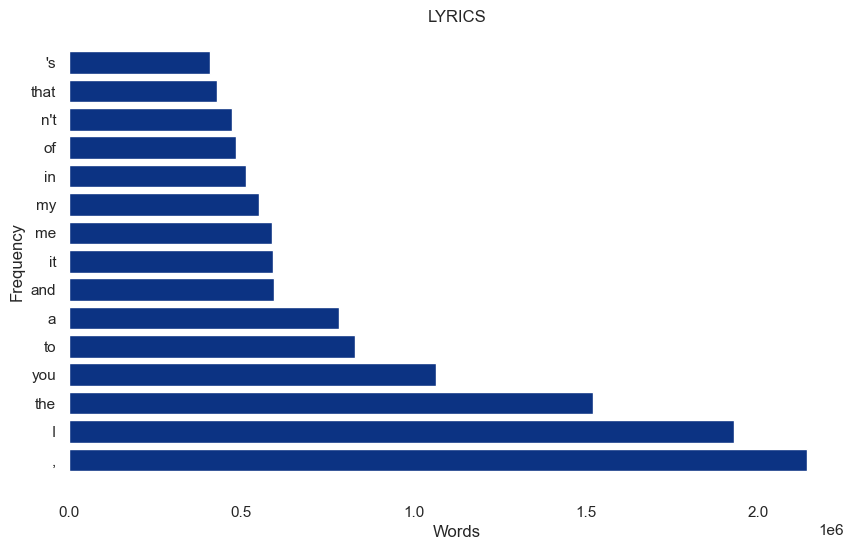

In [16]:
frequency_word_chart(udata, 'lyrics')

As we can analyze from the output above, the default state of the lyrics of our dataset is not good at all for analysis. The most appearing terms are very basic words (like "in", "my", "that", etc.) and also terms that are not even words - which is normal considering the text is not treated or processed (like "'s", "n't"). 

This just shows why we have to treat the data like we will in the following Part of this notebook.

## Part 1 - Pre-Processing the Data

##### 1.1 Case normalization

To start this part we will take the first step of any project that is related to text data: Lowering the case of every letter of every text sample.

In [17]:
# Lowerization Process
udata[udata.select_dtypes(['object']).columns] = udata.select_dtypes(['object']).apply(lambda x: x.str.lower())
udata

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
535805,walk away,rock,tony molina,2013,699,{},when you said you loved me\ndid you mean it th...
7519483,gotta make it kid naruto rap,rap,reece lett,2021,4,{sl!ck},kid naruto rap\n[hook]\neverybody wants you to...
4892808,​this is what i asked for,pop,elliot (dnk),2019,389,{},[verse 1]\npeople tell me i've changed\ni find...
1584150,stealing hearts,pop,katie armiger,2013,126,{},you've been warned about me\ndon't try to get ...
7639050,get ready,country,john campbell munro,1,2,{},[verse 1]\ni can see the end is coming but i’v...
...,...,...,...,...,...,...,...
1702980,manhattan,pop,tijuana sweetheart,2007,48,{},if i knew when i was young that i'd be older\n...
4802970,belly shit,rap,lil gotit,2019,3593,"{""lil troup""}",[intro: lil gotit]\ncash\nwah-wah-wah\nwah-wah...
403929,the four loves,rock,heath mcnease,2014,301,{},[verse 1]\ni was born inside a home\nthe young...


Having all text been reduced to lower case we will now handle the existent contractions in the text samples

##### 1.2 Handling Contractions

In [18]:
# Handling Contractions
# First we import a dictionary containing a list of some (most) existent contractions
contractions = {
"verse": "",
"chorus": "",
"i ain't": "i am not",
"he ain't": "he is not",
"she ain't": "she is not", 
"it ain't": "it is not", 
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"gimme" : "give me",
"gotta" : "have got",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "I shall",
"i'll've": "i shall have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have ",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as ",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": " they would",
"they'd've": "they would have",
"they'll": "they shall ",
"they'll've": "they shall have ",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": " we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall ",
"what'll've": "what shall have ",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": " who is",
"who've": "who have",
"why's": " why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you shall ",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have",
"youve" : "you have" 
}

udata.replace(contractions, regex=True, inplace = True)

udata

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
535805,walk away,rock,tony molina,2013,699,{},when you said you loved me\ndid you mean it th...
7519483,have got make it kid naruto rap,rap,reece lett,2021,4,{sl!ck},kid naruto rap\n[hook]\neverybody wants you to...
4892808,​this is what i asked for,pop,elliot (dnk),2019,389,{},[ 1]\npeople tell me i have changed\ni find it...
1584150,stealing hearts,pop,katie armiger,2013,126,{},you have been warned about me\ndo not try to g...
7639050,get ready,country,john campbell munro,1,2,{},[ 1]\ni can see the end is coming but i’ve nev...
...,...,...,...,...,...,...,...
1702980,manhattan,pop,tijuana sweetheart,2007,48,{},if i knew when i was young that i would be old...
4802970,belly shit,rap,lil gotit,2019,3593,"{""lil troup""}",[intro: lil gotit]\ncash\nwah-wah-wah\nwah-wah...
403929,the four loves,rock,heath mcnease,2014,301,{},[ 1]\ni was born inside a home\nthe youngest o...


##### 1.3 Removing random elements from the text

In this section we are going to remove various elements that we identified in the lyrics column that should not be within the data. This includes:
- Emojis;
- Random numbers;
- Indentation indications;
- Symbols (like brackets, punctuation, etc);

This will be done using a function that we created ourselves that can be checked in the `functions.py` file

In [19]:
udata['lyrics_processed'] = udata['lyrics'].apply(lambda x: remove(x))

In [20]:
udata

,title,tag,artist,year,views,features,lyrics,lyrics_processed
id,,,,,,,,
535805,walk away,rock,tony molina,2013,699,{},when you said you loved me\ndid you mean it th...,when you said you loved me did you mean it th...
7519483,have got make it kid naruto rap,rap,reece lett,2021,4,{sl!ck},kid naruto rap\n[hook]\neverybody wants you to...,kid naruto rap hook everybody wants you to hu...
4892808,​this is what i asked for,pop,elliot (dnk),2019,389,{},[ 1]\npeople tell me i have changed\ni find it...,people tell me i have changed i find it hard ...
1584150,stealing hearts,pop,katie armiger,2013,126,{},you have been warned about me\ndo not try to g...,you have been warned about me do not try to g...
7639050,get ready,country,john campbell munro,1,2,{},[ 1]\ni can see the end is coming but i’ve nev...,i can see the end is coming but ive never lik...
...,...,...,...,...,...,...,...,...
1702980,manhattan,pop,tijuana sweetheart,2007,48,{},if i knew when i was young that i would be old...,if i knew when i was young that i would be ol...
4802970,belly shit,rap,lil gotit,2019,3593,"{""lil troup""}",[intro: lil gotit]\ncash\nwah-wah-wah\nwah-wah...,intro lil gotit cash wah wah wah wah wah wah ...
403929,the four loves,rock,heath mcnease,2014,301,{},[ 1]\ni was born inside a home\nthe youngest o...,i was born inside a home the youngest of the ...


##### 1.4 Tokenization

In this step we will be tokenizing our lyrics column. The process of tokenizing consists of converting every sentence/ text sample into a list, where every word is an element of the given list.

In [21]:
udata['lyrics_tokenized'] = udata['lyrics_processed'].apply(tokenize_text)

In [22]:
#To check the results without having to run the cell above 
udata

,title,tag,artist,year,views,features,lyrics,lyrics_processed,lyrics_tokenized
id,,,,,,,,,
535805,walk away,rock,tony molina,2013,699,{},when you said you loved me\ndid you mean it th...,when you said you loved me did you mean it th...,"[when, you, said, you, loved, me, did, you, me..."
7519483,have got make it kid naruto rap,rap,reece lett,2021,4,{sl!ck},kid naruto rap\n[hook]\neverybody wants you to...,kid naruto rap hook everybody wants you to hu...,"[kid, naruto, rap, hook, everybody, wants, you..."
4892808,​this is what i asked for,pop,elliot (dnk),2019,389,{},[ 1]\npeople tell me i have changed\ni find it...,people tell me i have changed i find it hard ...,"[people, tell, me, i, have, changed, i, find, ..."
1584150,stealing hearts,pop,katie armiger,2013,126,{},you have been warned about me\ndo not try to g...,you have been warned about me do not try to g...,"[you, have, been, warned, about, me, do, not, ..."
7639050,get ready,country,john campbell munro,1,2,{},[ 1]\ni can see the end is coming but i’ve nev...,i can see the end is coming but ive never lik...,"[i, can, see, the, end, is, coming, but, ive, ..."
...,...,...,...,...,...,...,...,...,...
1702980,manhattan,pop,tijuana sweetheart,2007,48,{},if i knew when i was young that i would be old...,if i knew when i was young that i would be ol...,"[if, i, knew, when, i, was, young, that, i, wo..."
4802970,belly shit,rap,lil gotit,2019,3593,"{""lil troup""}",[intro: lil gotit]\ncash\nwah-wah-wah\nwah-wah...,intro lil gotit cash wah wah wah wah wah wah ...,"[intro, lil, gotit, cash, wah, wah, wah, wah, ..."
403929,the four loves,rock,heath mcnease,2014,301,{},[ 1]\ni was born inside a home\nthe youngest o...,i was born inside a home the youngest of the ...,"[i, was, born, inside, a, home, the, youngest,..."


##### 1.5 Different Language Verification

As it should be a normal procedure when dealing with larger samples of text data, one thing we could to is to verify if every word that we have in the dataset is in the same language. If not, we should do something to address them - whether it is to drop them or to translate them will depend on how many we have within the dataset.

Since this project is going to be done for songs whose lyrics are in English, we will treat English as the default language meaning we will check for those lines where we have non-english words

In [23]:
# Apply the language detection function to each row in the DataFrame
udata['language'] = udata['lyrics_tokenized'].apply(language_detector)

# Filter rows where the detected language is not English
non_english_rows = udata[udata['language'] != 'en']

In [24]:
non_english_rows

,title,tag,artist,year,views,features,lyrics,lyrics_processed,lyrics_tokenized,language
id,,,,,,,,,,
6005354,sweet little lady,pop,the big push,2020,3773,{},"hey, hey, hey\nhey, hey, hey\nhey, hey, hey\nh...",hey hey hey hey hey hey hey hey hey hey hey h...,"[hey, hey, hey, hey, hey, hey, hey, hey, hey, ...",so
6319502,little drummer boy,pop,ngela aguilar,2013,13,"{""ángela aguilar""}","[ 1]\ncome they told me, pa rum pum pum pum\na...",come they told me pa rum pum pum pum a newbor...,"[come, they, told, me, pa, rum, pum, pum, pum,...",pt
5654028,float,rock,barrie-james o'neill,2020,127,"{""barrie-james o\\'neill""}",i have not been in these waters before babe\nw...,i have not been in these waters before babe w...,"[i, have, not, been, in, these, waters, before...",tl
188473,in the back,pop,michael jackson,1999,4369,{},[ 1]\nyou are just preaching the bible\nand th...,you are just preaching the bible and they sti...,"[you, are, just, preaching, the, bible, and, t...",id
2234113,cant get you out of my head,pop,incognito,2002,265,{},la la la\nla la la la la\nla la la\nla la la l...,la la la la la la la la la la la la la la la ...,"[la, la, la, la, la, la, la, la, la, la, la, l...",ca
...,...,...,...,...,...,...,...,...,...,...
6291875,im god,rb,xxxxxexxxxx,2020,34,{},[ 1]\ni wanna see you in the nude\nlet us disa...,i wanna see you in the nude let us disappoint...,"[i, wan, na, see, you, in, the, nude, let, us,...",cy
742186,beautiful tornado,pop,flowers forever,2015,21,{},my eye opened up in the storm\noh beautiful to...,my eye opened up in the storm oh beautiful to...,"[my, eye, opened, up, in, the, storm, oh, beau...",af
3411483,alive,pop,dyro,2017,341,{},i feel the world rise up in me\ni feel the tid...,i feel the world rise up in me i feel the tid...,"[i, feel, the, world, rise, up, in, me, i, fee...",it


As we can see there are several lines where there are words that are identified as non-english. Furthermore we can also see from the rows that appear that most of the words of these lyrics are repeated and they don't appear like they will add a lot of information to our future tasks.

We are going to plot using the frequency_word_chart function that we used previously in the initial exploration the count of songs that we have per language.

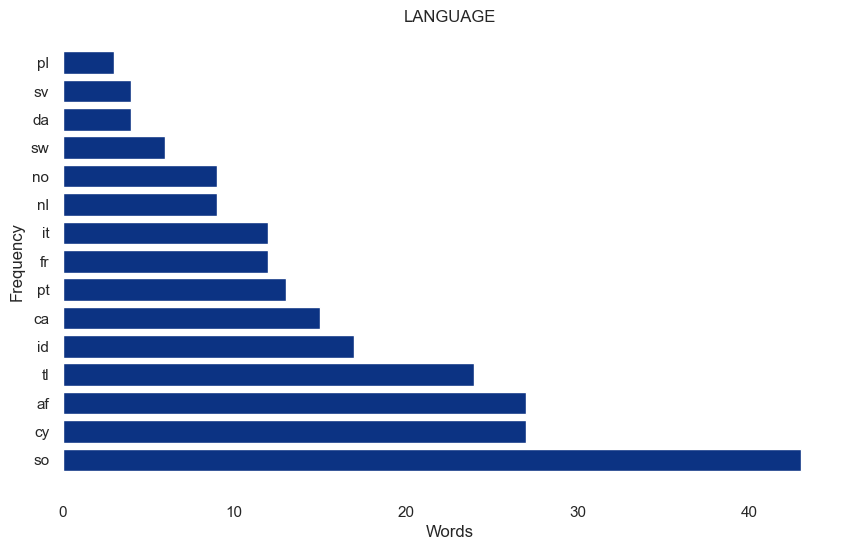

In [25]:
frequency_word_chart(non_english_rows, 'language')

It appears that out of those rows that contain 'non-enlgish' text, most of them contain Afrikaans terms (100+), dutch terms (nearly 60), danish terms (nearly 40) and so on.

One thing we can see is if these words appear repeatedly a lot of times in the same lyrics at the same time, because this could pose to be problematic in the phase of selecting the most effective words for the genre classification task.

We will be doing so using a function that we created that (also and again) in th `functions.py` file.

In [26]:
# Specify the count threshold
count_threshold = 20

# Filter rows where any word appears more than 5 times
result_df = filter_rows_by_any_word_count(non_english_rows, count_threshold)

# Display the result
result_df

,title,tag,artist,year,views,features,lyrics,lyrics_processed,lyrics_tokenized,language
id,,,,,,,,,,
6005354,sweet little lady,pop,the big push,2020,3773,{},"hey, hey, hey\nhey, hey, hey\nhey, hey, hey\nh...",hey hey hey hey hey hey hey hey hey hey hey h...,"[hey, hey, hey, hey, hey, hey, hey, hey, hey, ...",so
6319502,little drummer boy,pop,ngela aguilar,2013,13,"{""ángela aguilar""}","[ 1]\ncome they told me, pa rum pum pum pum\na...",come they told me pa rum pum pum pum a newbor...,"[come, they, told, me, pa, rum, pum, pum, pum,...",pt
5654028,float,rock,barrie-james o'neill,2020,127,"{""barrie-james o\\'neill""}",i have not been in these waters before babe\nw...,i have not been in these waters before babe w...,"[i, have, not, been, in, these, waters, before...",tl
188473,in the back,pop,michael jackson,1999,4369,{},[ 1]\nyou are just preaching the bible\nand th...,you are just preaching the bible and they sti...,"[you, are, just, preaching, the, bible, and, t...",id
2234113,cant get you out of my head,pop,incognito,2002,265,{},la la la\nla la la la la\nla la la\nla la la l...,la la la la la la la la la la la la la la la ...,"[la, la, la, la, la, la, la, la, la, la, la, l...",ca
...,...,...,...,...,...,...,...,...,...,...
6291875,im god,rb,xxxxxexxxxx,2020,34,{},[ 1]\ni wanna see you in the nude\nlet us disa...,i wanna see you in the nude let us disappoint...,"[i, wan, na, see, you, in, the, nude, let, us,...",cy
742186,beautiful tornado,pop,flowers forever,2015,21,{},my eye opened up in the storm\noh beautiful to...,my eye opened up in the storm oh beautiful to...,"[my, eye, opened, up, in, the, storm, oh, beau...",af
3411483,alive,pop,dyro,2017,341,{},i feel the world rise up in me\ni feel the tid...,i feel the world rise up in me i feel the tid...,"[i, feel, the, world, rise, up, in, me, i, fee...",it


As we can see in these subset rows of the dataframe, most of these rows contain what could be considered as the same words or terms or expressions and from what one can see they are very unlikely to be valuable for the future tasks that will be carried out in this project.

In the cell below we are going to plot using the pie chart function, the distribution of the tags among this subset of rows , to see if for some reason they all belong to the same genders.

In [27]:
#Making a donut chart to see the variation of total tags
create_donut_chart(non_english_rows, value_column='count', names_column='tag',
                   title='Donut Chart of Tag Distribution',
                   labels={'index': 'Tag', 'tag': 'Count'})

In [28]:
#change 279
233/134967

0.0017263479220846578

We can clearly see from looking at the output pie chart that the majority of these observations also belong to the majority classes of our dataset (pop, rock and rap).

Like it was mentioned above, since the words belonging to these rows are unlikely to be useful for the future tasks that will be carried out (both the genre classification and the sentiment analysis) and could generate some sort of bias for the minority classes and also noting that these rows only account for just about 0.2% of the dataset, we will be dropping them from the dataset.This will also help us in tweaking a little bit distribution of the tags and reducing the unbalacedness of the dataset.

In [29]:
#Dropping non english rows and unknowns
udata.drop(non_english_rows.index, inplace = True)

Now, since the language column is going to be useless from this point forward we will drop it from the dataset (to make it cleaner)

In [30]:
#Dropping the language column
udata.drop(columns='language', inplace=True)

##### 1.6 Stopword Removal

In this step we are going to remove the stopwords from every observation in the lyrics column, also creating a new column for the results

In [31]:
stopwords = nltk.corpus.stopwords.words("english")
udata['lyrics_tokenized_filtered'] = udata['lyrics_tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [32]:
udata

,title,tag,artist,year,views,features,lyrics,lyrics_processed,lyrics_tokenized,lyrics_tokenized_filtered
id,,,,,,,,,,
535805,walk away,rock,tony molina,2013,699,{},when you said you loved me\ndid you mean it th...,when you said you loved me did you mean it th...,"[when, you, said, you, loved, me, did, you, me...","[said, loved, mean, change, mind, one, day, pr..."
7519483,have got make it kid naruto rap,rap,reece lett,2021,4,{sl!ck},kid naruto rap\n[hook]\neverybody wants you to...,kid naruto rap hook everybody wants you to hu...,"[kid, naruto, rap, hook, everybody, wants, you...","[kid, naruto, rap, hook, everybody, wants, hur..."
4892808,​this is what i asked for,pop,elliot (dnk),2019,389,{},[ 1]\npeople tell me i have changed\ni find it...,people tell me i have changed i find it hard ...,"[people, tell, me, i, have, changed, i, find, ...","[people, tell, changed, find, hard, explain, m..."
1584150,stealing hearts,pop,katie armiger,2013,126,{},you have been warned about me\ndo not try to g...,you have been warned about me do not try to g...,"[you, have, been, warned, about, me, do, not, ...","[warned, try, get, close, know, want, chain, s..."
7639050,get ready,country,john campbell munro,1,2,{},[ 1]\ni can see the end is coming but i’ve nev...,i can see the end is coming but ive never lik...,"[i, can, see, the, end, is, coming, but, ive, ...","[see, end, coming, ive, never, liked, odds, ne..."
...,...,...,...,...,...,...,...,...,...,...
1702980,manhattan,pop,tijuana sweetheart,2007,48,{},if i knew when i was young that i would be old...,if i knew when i was young that i would be ol...,"[if, i, knew, when, i, was, young, that, i, wo...","[knew, young, would, older, many, things, woul..."
4802970,belly shit,rap,lil gotit,2019,3593,"{""lil troup""}",[intro: lil gotit]\ncash\nwah-wah-wah\nwah-wah...,intro lil gotit cash wah wah wah wah wah wah ...,"[intro, lil, gotit, cash, wah, wah, wah, wah, ...","[intro, lil, gotit, cash, wah, wah, wah, wah, ..."
403929,the four loves,rock,heath mcnease,2014,301,{},[ 1]\ni was born inside a home\nthe youngest o...,i was born inside a home the youngest of the ...,"[i, was, born, inside, a, home, the, youngest,...","[born, inside, home, youngest, three, boys, fo..."


##### 1.7 Lemmatization (with POS Tagging)

In [33]:
udata['lyrics_tokenized_lemmatized'] = udata['lyrics_tokenized_filtered'].apply(lemmatizator)

In [34]:
udata

,title,tag,artist,year,views,features,lyrics,lyrics_processed,lyrics_tokenized,lyrics_tokenized_filtered,lyrics_tokenized_lemmatized
id,,,,,,,,,,,
535805,walk away,rock,tony molina,2013,699,{},when you said you loved me\ndid you mean it th...,when you said you loved me did you mean it th...,"[when, you, said, you, loved, me, did, you, me...","[said, loved, mean, change, mind, one, day, pr...","[say, love, mean, change, mind, one, day, pret..."
7519483,have got make it kid naruto rap,rap,reece lett,2021,4,{sl!ck},kid naruto rap\n[hook]\neverybody wants you to...,kid naruto rap hook everybody wants you to hu...,"[kid, naruto, rap, hook, everybody, wants, you...","[kid, naruto, rap, hook, everybody, wants, hur...","[kid, naruto, rap, hook, everybody, want, hurt..."
4892808,​this is what i asked for,pop,elliot (dnk),2019,389,{},[ 1]\npeople tell me i have changed\ni find it...,people tell me i have changed i find it hard ...,"[people, tell, me, i, have, changed, i, find, ...","[people, tell, changed, find, hard, explain, m...","[people, tell, change, find, hard, explain, ma..."
1584150,stealing hearts,pop,katie armiger,2013,126,{},you have been warned about me\ndo not try to g...,you have been warned about me do not try to g...,"[you, have, been, warned, about, me, do, not, ...","[warned, try, get, close, know, want, chain, s...","[warn, try, get, close, know, want, chain, sha..."
7639050,get ready,country,john campbell munro,1,2,{},[ 1]\ni can see the end is coming but i’ve nev...,i can see the end is coming but ive never lik...,"[i, can, see, the, end, is, coming, but, ive, ...","[see, end, coming, ive, never, liked, odds, ne...","[see, end, come, ive, never, like, odds, need,..."
...,...,...,...,...,...,...,...,...,...,...,...
1702980,manhattan,pop,tijuana sweetheart,2007,48,{},if i knew when i was young that i would be old...,if i knew when i was young that i would be ol...,"[if, i, knew, when, i, was, young, that, i, wo...","[knew, young, would, older, many, things, woul...","[know, young, would, old, many, thing, would, ..."
4802970,belly shit,rap,lil gotit,2019,3593,"{""lil troup""}",[intro: lil gotit]\ncash\nwah-wah-wah\nwah-wah...,intro lil gotit cash wah wah wah wah wah wah ...,"[intro, lil, gotit, cash, wah, wah, wah, wah, ...","[intro, lil, gotit, cash, wah, wah, wah, wah, ...","[intro, lil, gotit, cash, wah, wah, wah, wah, ..."
403929,the four loves,rock,heath mcnease,2014,301,{},[ 1]\ni was born inside a home\nthe youngest o...,i was born inside a home the youngest of the ...,"[i, was, born, inside, a, home, the, youngest,...","[born, inside, home, youngest, three, boys, fo...","[bear, inside, home, young, three, boy, fight,..."


Having concluded all these steps, we can now say that our lyrics column is ready to be used for the follwoing stages of this project. So, we will join all tokens back in order to make every lyric a normal string

In [35]:
#Joining together the lyrics tokens
udata['lyrics_string_clean'] = udata['lyrics_tokenized_lemmatized'].apply(lambda x: ' '.join(x))

In [36]:
udata

,title,tag,artist,year,views,features,lyrics,lyrics_processed,lyrics_tokenized,lyrics_tokenized_filtered,lyrics_tokenized_lemmatized,lyrics_string_clean
id,,,,,,,,,,,,
535805,walk away,rock,tony molina,2013,699,{},when you said you loved me\ndid you mean it th...,when you said you loved me did you mean it th...,"[when, you, said, you, loved, me, did, you, me...","[said, loved, mean, change, mind, one, day, pr...","[say, love, mean, change, mind, one, day, pret...",say love mean change mind one day pretend caus...
7519483,have got make it kid naruto rap,rap,reece lett,2021,4,{sl!ck},kid naruto rap\n[hook]\neverybody wants you to...,kid naruto rap hook everybody wants you to hu...,"[kid, naruto, rap, hook, everybody, wants, you...","[kid, naruto, rap, hook, everybody, wants, hur...","[kid, naruto, rap, hook, everybody, want, hurt...",kid naruto rap hook everybody want hurt everyb...
4892808,​this is what i asked for,pop,elliot (dnk),2019,389,{},[ 1]\npeople tell me i have changed\ni find it...,people tell me i have changed i find it hard ...,"[people, tell, me, i, have, changed, i, find, ...","[people, tell, changed, find, hard, explain, m...","[people, tell, change, find, hard, explain, ma...",people tell change find hard explain maybe fee...
1584150,stealing hearts,pop,katie armiger,2013,126,{},you have been warned about me\ndo not try to g...,you have been warned about me do not try to g...,"[you, have, been, warned, about, me, do, not, ...","[warned, try, get, close, know, want, chain, s...","[warn, try, get, close, know, want, chain, sha...",warn try get close know want chain shall leave...
7639050,get ready,country,john campbell munro,1,2,{},[ 1]\ni can see the end is coming but i’ve nev...,i can see the end is coming but ive never lik...,"[i, can, see, the, end, is, coming, but, ive, ...","[see, end, coming, ive, never, liked, odds, ne...","[see, end, come, ive, never, like, odds, need,...",see end come ive never like odds need way even...
...,...,...,...,...,...,...,...,...,...,...,...,...
1702980,manhattan,pop,tijuana sweetheart,2007,48,{},if i knew when i was young that i would be old...,if i knew when i was young that i would be ol...,"[if, i, knew, when, i, was, young, that, i, wo...","[knew, young, would, older, many, things, woul...","[know, young, would, old, many, thing, would, ...",know young would old many thing would tell cha...
4802970,belly shit,rap,lil gotit,2019,3593,"{""lil troup""}",[intro: lil gotit]\ncash\nwah-wah-wah\nwah-wah...,intro lil gotit cash wah wah wah wah wah wah ...,"[intro, lil, gotit, cash, wah, wah, wah, wah, ...","[intro, lil, gotit, cash, wah, wah, wah, wah, ...","[intro, lil, gotit, cash, wah, wah, wah, wah, ...",intro lil gotit cash wah wah wah wah wah wah e...
403929,the four loves,rock,heath mcnease,2014,301,{},[ 1]\ni was born inside a home\nthe youngest o...,i was born inside a home the youngest of the ...,"[i, was, born, inside, a, home, the, youngest,...","[born, inside, home, youngest, three, boys, fo...","[bear, inside, home, young, three, boy, fight,...",bear inside home young three boy fight daddy s...


Now we will simply rename the dataframe in order to exclude all the columns that were created during the pre-processing stages, maintaining only the original columns and replacing the original and untreated lyrics with the results of this preprocessing.

In [37]:
data = udata[['title',
                  'tag',
                  'artist',
                  'year',
                  'views',
                  'features',
                  'lyrics_string_clean']].rename(columns={'lyrics_string_clean': 'lyrics'}).reset_index()

##### 1.8. Pre-Processing the Test Dataset

Now, without having to explain them again (to make the notebook not redundant) we will apply the same preprocessing steps to the test dataset, with exception to the removal of the non-english rows (which we can't do in the test set because of the indexes that will be used for the kaggle competition)

In [38]:
test_data = pd.read_csv("C:\\Users\\danie\\Downloads\\data_updated\\test.csv", index_col='id')

In [39]:
test_data

,title,artist,year,views,features,lyrics
id,,,,,,
3996359,Like You Do,Jimmie Allen,2018,825,{},[Verse 1]\nYour head's on my chest\nThis bed's...
3553166,This Building is Falling Down,The Taxpayers,2009,400,{},Epilogue: A sound off from simple people with ...
2998742,My Private Joy,Dion and The Belmonts,1960,229,{},[Verse 1]\nOh well Susie is a doozy with a pon...
3993470,Vegan,Yung Kurry,2018,1041,{},Hook\nShe a vegan but she eat my meat with no ...
5488256,To The Boy I Used To Know,Angelina Cruz,2018,63,{},To the boy I used to know\nI wonder how do you...
...,...,...,...,...,...,...
1149534,My Life With You,Celtic Thunder,2015,32,{},When I was a younger man\nWhen I was a silly b...
2473358,Work it out,The Jacka,2014,488,{Husalah},[Intro]\nNigga did you take my money?\nHehehe ...
5254514,No More,Darling West,2016,20,{},The moon is hanging high above\nA long and dus...


In [40]:
#Caps Normalization 
test_data[test_data.select_dtypes(['object']).columns] = test_data.select_dtypes(['object']).apply(lambda x: x.str.lower())

In [41]:
#Handling the contractions
test_data.replace(contractions, regex=True, inplace = True)

In [42]:
#Removing Random Elements From the Lyrics
test_data['lyrics_processed'] = test_data['lyrics'].apply(lambda x: remove(x))

In [43]:
#Tokenization
test_data['lyrics_tokenized'] = test_data['lyrics_processed'].apply(tokenize_text)

In [44]:
#Stopword Removal
test_data['lyrics_tokenized_filtered'] = test_data['lyrics_tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [45]:
#Lemmatization
test_data['lyrics_tokenized_lemmatized'] = test_data['lyrics_tokenized_filtered'].apply(lemmatizator)

In [46]:
#Joining together
test_data['lyrics_string_clean'] = test_data['lyrics_tokenized_lemmatized'].apply(lambda x: ' '.join(x))

In [47]:
#Re-making the dataframe
data_test = test_data[['title',
                  'artist',
                  'year',
                  'views',
                  'features',
                  'lyrics_string_clean']].rename(columns={'lyrics_string_clean': 'lyrics'}).reset_index()

In [48]:
data_test

,id,title,artist,year,views,features,lyrics
0,3996359,like you do,jimmie allen,2018,825,{},head chest bed mess empty bottle red wine tell...
1,3553166,this building is falling down,the taxpayers,2009,400,{},epilogue sound simple people simple theory fuc...
2,2998742,my private joy,dion and the belmonts,1960,229,{},oh well susie doozy pony tail wear gold polish...
3,3993470,vegan,yung kurry,2018,1041,{},hook vegan eat meat season take one look wrist...
4,5488256,to the boy i used to know,angelina cruz,2018,63,{},boy use know wonder boy iusedto know youknow s...
...,...,...,...,...,...,...,...
33737,1149534,my life with you,celtic thunder,2015,32,{},young man silly boy need thing strong anything...
33738,2473358,work it out,the jacka,2014,488,{husalah},intro nigga take money hehehe right lil bitch ...
33739,5254514,no more,darling west,2016,20,{},moon hang high long dusty red dirt road blood ...
33740,1646153,wait,stacie orrico,2006,327,{},make mistake argument say thing mean say wait ...


## Part 2 - Taking a look at the Dataset after the Treatment (after-preproc)

Having treated the data (both training and test sets), we will now make some visualizations to see how it looks after these changes. We will obviously only take a look at those variables that are os most interest to us - in essence those that we treated and dealt with in the previous section of this same notebook.

#### _Variable `tag`_

In [49]:
#Making a donut chart to see the variation of total tags
create_donut_chart(data, value_column='count', names_column='tag',
                   title='Donut Chart of Tag Distribution',
                   labels={'index': 'Tag', 'tag': 'Count'})


As we can see the pie chart looks exactly the same despite us having dropped those rows containing non-english text. 

#### _Variable `Lyrics`_

Now for the lyrics variable, instead of using only the bar charts to display the most common words, we will also use wordclouds to display a sample of som of the most common terms that appear in the treated text.

##### Bar chart of the most common terms

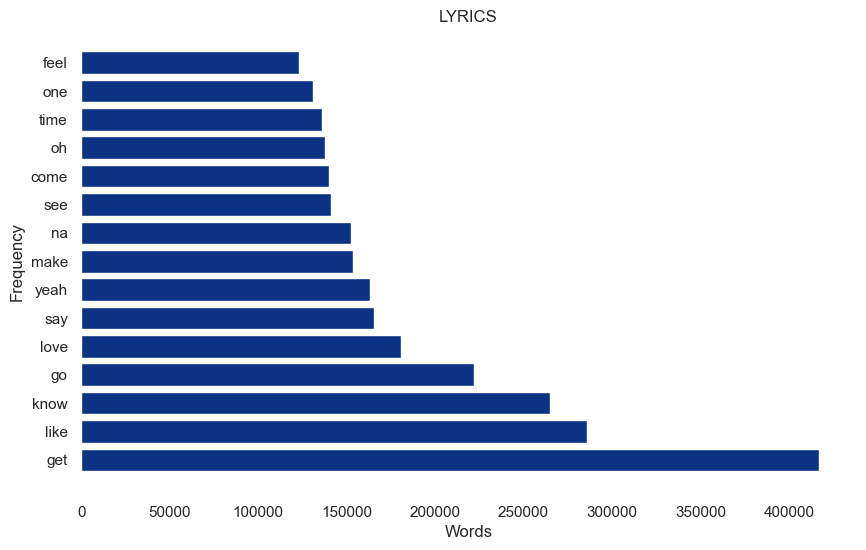

In [50]:
frequency_word_chart(data, 'lyrics')

From looking at the output above, we can realize that the treatment of the 'lyrics' column was executed propperly. Now, our most common words are actually words that make sense.

##### WordCloud of the most common words

Here we will be building some wordclouds to help display in a more intuitive manner the most appearing words in the 'lyrics' column. To do so, we will extract a sample containing the 1500 most common terms that appear in the treated text.

In [51]:
# Sample a subset of the data
sample_size = 1500 # Adjust this based on your needs
sampled_lyrics = ' '.join(data['lyrics'].dropna().sample(sample_size))

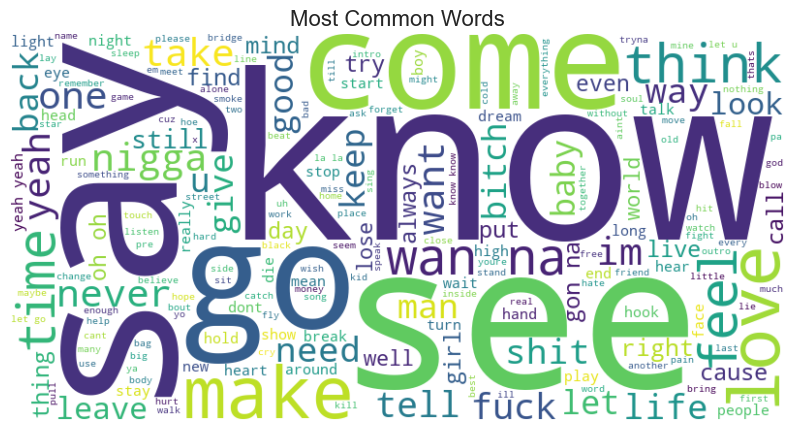

In [52]:
wordcloud_generator(sampled_lyrics, 'Most Common Words')

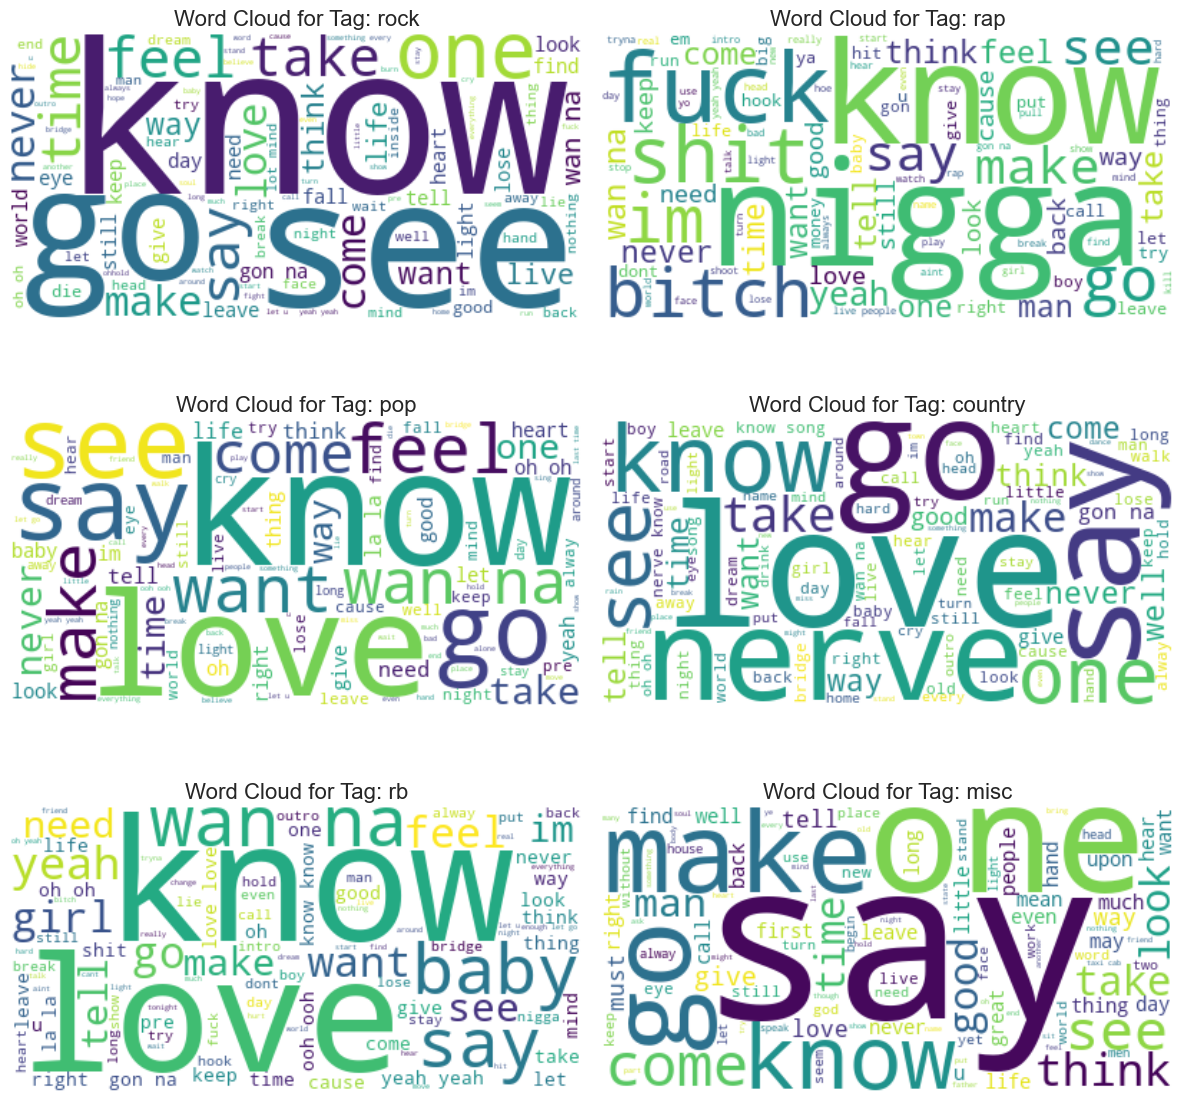

In [53]:
# Example usage:
# Assuming your DataFrame is named 'udata' and contains 'tag' and 'lyrics' columns
wordcloud_generator_for_tags(data, tag_column='tag', lyrics_column='lyrics')


As we can see, from the wordclouds above the most common words vary a lot, from tag to tag which is a very good indicator for when we will be creating the sentiment analysis and the genre classification models.

## Part 3 - Exporting the final datasets

To finalize this notebook we will export the resulting dataframes which will be used in the following sections of this project

In [54]:
# Exporting the training data
#data.to_csv("C:\\Users\\danie\\Desktop\\after_preproc_data\\train_preproc.csv")

In [55]:
# Exporting the test data
#data_test.to_csv("C:\\Users\\danie\\Desktop\\after_preproc_data\\test_preproc.csv")